In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seoul_traffic = pd.read_excel('./data/노선별 시간대별 교통량(평일).xlsx')
seoul_traffic.head(8)

,서울도시고속도로 노선별 시간대별 교통량(평일평균),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,(단위 : 대/일)
0,시간대,내부순환로,NaN,강변북로,NaN,북부간선도로,NaN,올림픽대로,NaN,동부간선도로,NaN,분당수서로,NaN,경부고속도로,NaN,서부간선도로,NaN,강남순환로,NaN
1,NaN,동향,서향,동향,서향,동향,서향,동향,서향,북향,남향,북향,남향,북향,남향,북향,남향,동향,서향
2,0,1296,1012,2480,2086,1070,814,1945,2790,1916,1118,988,1097,1822,2239,1356,1486,531,803
3,1,880,695,1633,1374,748,570,1308,1974,1278,745,749,684,1297,1456,869,933,309,480
4,2,634,528,1217,1002,588,440,1018,1537,907,567,576,512,1015,1102,651,668,220,322
5,3,590,536,1182,924,561,499,1124,1362,768,647,540,489,971,1113,667,636,213,268
6,4,923,1027,1985,1250,928,925,1989,1726,896,1356,756,784,1271,1950,1229,1175,414,366
7,5,2348,2793,5145,2867,2258,2300,5212,3331,1683,3877,1901,2590,3080,4598,2485,2328,1882,933


In [4]:
#분당수서로 북향
bun_n = seoul_traffic.iloc[2:,11]
bun_n

2      988
3      749
4      576
5      540
6      756
7     1901
8     3701
9     3843
10    3855
11    3721
12    3649
13    3599
14    3586
15    3575
16    3542
17    3547
18    3589
19    3603
20    3469
21    3189
22    3186
23    3095
24    2660
25    1672
Name: Unnamed: 11, dtype: object

In [6]:
#분당수서로 남향
bun_s = seoul_traffic.iloc[2:,12]
bun_s

2     1097
3      684
4      512
5      489
6      784
7     2590
8     3834
9     3848
10    3604
11    3550
12    3501
13    3522
14    3576
15    3539
16    3502
17    3569
18    3649
19    3618
20    3586
21    3432
22    3233
23    3130
24    2852
25    1907
Name: Unnamed: 12, dtype: object

In [7]:
#분당수서로 북향,남향 통행량 차이
bun = seoul_traffic.iloc[2:,11:13]
bun = bun.diff(axis=1)
bun = bun.abs()
bun_diff = bun.iloc[:,1]
bun_diff = bun_diff.values

In [8]:
#분당수서로 통행량 평균
bun = seoul_traffic.iloc[2:,11:13]
bun_mean = bun.mean(axis=1)
bun_mean = bun_mean.values

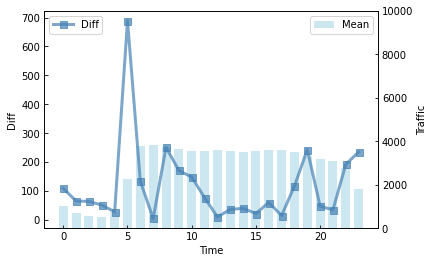

In [9]:
#시각화하기
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 9

# 2. 데이터 준비
x = np.arange(24)
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, bun_diff, '-s', color='steelblue', markersize=7, linewidth=3, alpha=0.7, label='Diff')
ax1.set_xlabel('Time')
ax1.set_ylabel('Diff')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, bun_mean, color='lightblue', label='Mean', alpha=0.6, width=0.7)
ax2.set_ylabel('Traffic')
ax2.tick_params(axis='y', direction='in')
ax2.set_ylim(0, 10000)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()